In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

## 1. Read data and clean data

In [2]:
with open ('reviews_update.csv', 'r') as review:
    df = pd.read_csv(review, encoding = 'utf8')
    
col_name = ['id','movie', 'review_title', 'rate', 'body', 'helpfulness']
df.columns = col_name

In [3]:
df.head(10)# how the data looks like

,id,movie,review_title,rate,body,helpfulness
0,0,10 Years,So glad I didn't listen to most of the reviews!',\n \n \n ...,"Before I watched this movie, I read some revie...",37 out of 41 found this helpful.\n ...
1,1,10 Years,"Not exactly reinventing the wheel, but worth w...",\n \n \n ...,"In his directorial debut ""Ten Year"", Jamie Lin...",57 out of 67 found this helpful.\n ...
2,2,10 Years,Sweet and memorable reunion movie,\n \n \n ...,'10 Years' is all about reunion of high school...,8 out of 8 found this helpful.\n ...
3,3,10 Years,"It might not be a genre defining film, but it ...",\n \n \n ...,¨Now the party can start!¨The film is about a ...,24 out of 30 found this helpful.\n ...
4,4,10 Years,A Gem,\n \n \n ...,Definitely worth seeing. I thoroughly enjoyed ...,27 out of 36 found this helpful.\n ...
5,5,10 Years,What You Can Expect: 10 Years,\n \n \n ...,What you can expect from 10 Years is a predict...,4 out of 4 found this helpful.\n ...
6,6,10 Years,Closely replicates the unintentional tension o...,\n \n \n ...,High school reunions can be equal parts helpfu...,12 out of 16 found this helpful.\n ...
7,7,10 Years,Realistic,\n \n \n ...,This movie was fun but parts where very predic...,6 out of 7 found this helpful.\n ...
8,8,10 Years,"Like a documentary, but that's the problem",\n \n \n ...,"In ""Grosse Point Blank,"" John Cusack, a hit-ma...",17 out of 27 found this helpful.\n ...
9,9,10 Years,Almost turned it off,\n \n \n ...,I'll make this short. It was boring. Though it...,12 out of 18 found this helpful.\n ...


In [4]:
for i in range(len(df['rate'])):
    score = df['rate'][i].split()[0]
    df.loc[i, 'rate']= score[:score.find('/')]

In [5]:
# converting the helpful column into numeric number
for i in range(len(df['helpfulness'])):
    try:
        helpful = df['helpfulness'][i]
        num1 = re.findall(r'\d+', helpful)[0]
        num2 = re.findall(r'\d+', helpful)[1]
        df.loc[i, 'helpfulness']= float(float(num1)/float(num2))
    except:
        # there is no one think the review helpful
        # meaning: num1 = 0 & num2 = 0
        df.loc[i, 'helpfulness']= 0

In [6]:
df.head() # how the data looks like

,id,movie,review_title,rate,body,helpfulness
0,0,10 Years,So glad I didn't listen to most of the reviews!',10,"Before I watched this movie, I read some revie...",0.902439
1,1,10 Years,"Not exactly reinventing the wheel, but worth w...",7,"In his directorial debut ""Ten Year"", Jamie Lin...",0.850746
2,2,10 Years,Sweet and memorable reunion movie,7,'10 Years' is all about reunion of high school...,1
3,3,10 Years,"It might not be a genre defining film, but it ...",7,¨Now the party can start!¨The film is about a ...,0.8
4,4,10 Years,A Gem,9,Definitely worth seeing. I thoroughly enjoyed ...,0.75


# 2. EDA of review dataset
- Result:
    1. There are 21368 rows in the dataset.
    2. The distribution of the rate is not balanced. Many rates are 1 point and 8 point.
    3. The length of the review for all category are distributed in the similar way.
    4. The dataset is quite clean.

In [7]:
len(df) # number of rows

21368

In [13]:
len(df.movie.value_counts())
# df.movie.value_counts().plot('bar', color = 'blue')
# plt.title('The histogram of movie title')
# plt.show()

932

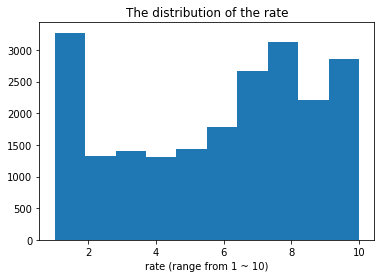

In [14]:
# the distribution of the rate
rate = pd.to_numeric(df['rate'])
plt.hist(rate)
plt.title('The distribution of the rate')
plt.xlabel('rate (range from 1 ~ 10)')
plt.show()

In [15]:
# get the length of the review
length = df['body'].apply(len)
df['text length'] = length
min(length) # minium length of the review

67

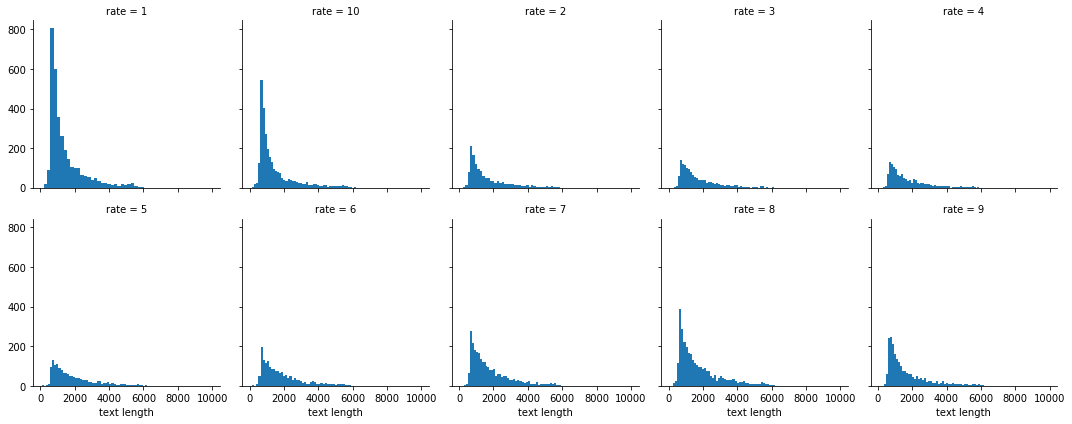

In [16]:
# the relationship between text length and the rate
# when rate = 1, many reviews are short ones
# the same thing happens when rate =10
g = sns.FacetGrid(data=df, col='rate', col_wrap=5)
g.map(plt.hist, 'text length', bins=50)

Text(0.5,1,'The boxplot of the text length of different rate category')

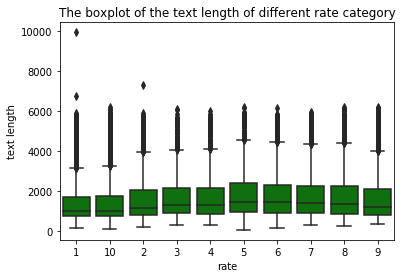

In [19]:
m = sns.boxplot(x='rate', y='text length', data=df, color='green')
m.set_title('The boxplot of the text length of different rate category', size=12)

In [31]:
test_sent = df.body[11]
print (df.body[11])
reviews = df.body
# after several checking, the text itself is pretty clean

I recently saw ten year at a prescreening event and was really impressed! The movie takes place all on the night of a 10 year high school reunion. The cast is great and there are a lot of funny and heartwarming moments. Being in my late twenties myself, I found this movie to be really relatable. The cast reminded me of my friends and the plot (although a little over the top at some parts) was very believable. My boyfriend who saw it with me said he thought that there needed to be more of a plot – because it was more of a movie where you find out about the characters rather than a lot of stuff happening. I thought that a good plot wasn't the point of the movie though. There was also a really good song in the movie. Overall, I would recommend this movie to most people – especially anyone in their mid twenties to mid thirties. I probably won't see it again in the theater but I thought it was really good. It also had a very satisfying ending, which I love.


# 3. text preprocessing
- The preprocessing is mainly focusing on part of speech filter.
    1. First step is to try to keep most of information of the sentence, hence, I keep noun, adjective and adverb.
    2. However, after building the model, I realize that the sentiment of the review is mainly experessed via the adjective. Hence, for the final preprocessing, I only keep the adjective and adverb.
    3. Meanwhile, I use tf-idf for the classification model. Tried both tf-idf and smooth tf-idf.
    4. Using n-gram: after trying different n-gram, I decide to use 1 to 3-gram.

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

In [33]:
import spacy
nlp = spacy.load('en')

In [34]:
class PartOfSpeechFilter(BaseEstimator, TransformerMixin):
    '''only keep the adjective and adverb'''
    def __init__(self, pos_to_keep=('NOUN', 'PROPN', 'ADJ', 'VERB', 'ADV'), stop_words=None):
        self.pos_to_keep = pos_to_keep
        self.stop_words = stop_words
        
    def fit(self, X, y=None):
        return self
        
        
    def transform(self, X):
        preprocessed_sentences = []
        
        for doc in nlp.pipe(X, n_threads=8):
            if self.stop_words is not None:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep and t.lemma_ not in self.stop_words
                                              and t.is_alpha and not t.is_punct])
            else:
                keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in self.pos_to_keep])
            preprocessed_sentences.append(keep_tokens_string)
    
        return preprocessed_sentences 

In [35]:
# we will only focus on the text.
df_review = df[['body', 'rate']]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
train, test = train_test_split(df_review, test_size=0.2, random_state=666)
print("%d items in training data, %d in test data" % (len(train), len(test)))

17094 items in training data, 4274 in test data


In [38]:
x_train = train.body
y_train = train.rate
x_test = test.body
y_test = test.rate

In [39]:
# After trying keep most of the tags including noun, adjective and adverb, there are a huge overfitting issue.
# Adjective and adverb are actually the part contain sentiment, hence I will only keep those two tags.  

In [40]:
posf = PartOfSpeechFilter(pos_to_keep=('ADJ', 'ADV'))

In [41]:
%%time
preproc_sents = posf.fit_transform(x_train)

CPU times: user 26min 32s, sys: 7min 58s, total: 34min 31s
Wall time: 21min 59s


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words

In [43]:
# update the stopwords list
stopWords = list(stop_words.ENGLISH_STOP_WORDS) + ["'s", "'ve", "'d", 'is',"'ll", 'pron','aa']
stopWords.remove('not')
stopWords.remove('no')
stopWords.remove('never')
stopWords.remove('none')
stopWords.remove('serious')
stopWords.remove('thin')
stopWords.remove('thick')
stopWords.remove('sincere')
stopWords.remove('several')

In [294]:
%%time
# only keep features 
tfidf = TfidfVectorizer(lowercase=True, norm='l1', stop_words=stopWords, ngram_range=(1,3), use_idf=True, min_df=0.01)
review_tfidf = tfidf.fit_transform(preproc_sents)

CPU times: user 6.08 s, sys: 211 ms, total: 6.29 s
Wall time: 6.32 s


In [295]:
review_tfidf.toarray().shape # after filtering some not important words, now we have 2017 features

(17094, 631)

In [296]:
# take a looreview_tfidf_alls that we have
words_sum = review_tfidf.sum(axis=0)
counts_per_word = list(zip(tfidf.get_feature_names(), words_sum.A1))
sorted(counts_per_word, key=lambda t: t[1], reverse=True)[:20]
# some of the words that occure the most frequent

[('not', 666.8363502538789),
 ('good', 338.01374122103147),
 ('just', 275.27285409929993),
 ('really', 222.50986428047173),
 ('great', 192.86965720890464),
 ('bad', 186.41776300938196),
 ('not not', 137.8667583220431),
 ('funny', 129.1454021221428),
 ('never', 127.4342692945201),
 ('little', 126.50415774642786),
 ('real', 118.20050747537613),
 ('old', 110.78371428131818),
 ('big', 100.76278084588336),
 ('actually', 100.46367376582404),
 ('young', 97.72836569128586),
 ('new', 93.81970518714728),
 ('quite', 91.03997400083533),
 ('pretty', 88.33510649739505),
 ('long', 86.31258310358416),
 ('interesting', 81.55376601542557)]

In [297]:
# some of the words that not so frequent in the reviews
sorted(counts_per_word, key=lambda t: t[1], reverse=True)[-10:]

[('especially not', 8.683244389382368),
 ('nonetheless', 8.559601285012972),
 ('prior', 8.529559101110504),
 ('previously', 8.52637569461545),
 ('initial', 8.442384210332206),
 ('largely', 8.43803837622397),
 ('not particularly', 8.385560100729181),
 ('effectively', 8.273395795702802),
 ('no longer', 8.25356986888688),
 ('practically', 7.886723616375228)]

# 4. Build the model
- There are several stage of building model:
    1. Building a model based on 10 classes.
    2. Building a model based on 3 classes.

In [298]:
from sklearn.linear_model import LogisticRegression

In [299]:
from sklearn.model_selection import cross_validate

In [302]:
lr = LogisticRegression()
lr.fit(review_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [303]:
scores = cross_validate(lr, review_tfidf, y_train, cv=10, 
                        scoring=['accuracy'],
                        return_train_score=True
                       )
scores # not a very good result

{'fit_time': array([0.82999992, 1.09065914, 0.91418076, 0.83136725, 0.81148291,
        0.97160077, 0.91153002, 0.82503414, 0.81417513, 0.95345306]),
 'score_time': array([0.00253391, 0.00236583, 0.00290322, 0.00254369, 0.00237417,
        0.00236821, 0.002388  , 0.00234795, 0.00238085, 0.00276184]),
 'test_accuracy': array([0.2957993 , 0.29246935, 0.28563084, 0.30625365, 0.30035129,
        0.28395785, 0.28220141, 0.28395785, 0.29759813, 0.28445748]),
 'train_accuracy': array([0.31495449, 0.31766465, 0.31959433, 0.31638822, 0.31756142,
        0.31866632, 0.31730144, 0.31931626, 0.31442126, 0.32042368])}

In [54]:
# test on the test data

In [55]:
%%time
test_tfidf = posf.transform(x_test)

CPU times: user 6min 32s, sys: 1min 55s, total: 8min 28s
Wall time: 5min 18s


In [304]:
tfidf_test = tfidf.transform(test_tfidf)

In [305]:
# accuracy on the test data
lr.score(tfidf_test, y_test)

0.2959756668226486

In [306]:
from sklearn.metrics import confusion_matrix

In [307]:
conf_matrix = confusion_matrix(y_test, lr.predict(tfidf_test))
conf_matrix

array([[552,  19,   0,   0,   0,   0,   0,  28,  44,   0],
       [ 81, 271,   0,   0,   0,   0,   0,  34, 223,   1],
       [181,  14,   0,   0,   0,   0,   0,  15,  38,   0],
       [178,  14,   0,   0,   0,   0,   0,  21,  44,   0],
       [153,  16,   0,   0,   0,   0,   0,  42,  66,   1],
       [147,  14,   0,   0,   0,   0,   0,  47,  89,   0],
       [125,  19,   0,   0,   0,   0,   0,  77, 131,   0],
       [ 99,  71,   0,   0,   0,   0,   0,  81, 255,   0],
       [101, 113,   0,   0,   0,   0,   0,  60, 360,   2],
       [ 62, 138,   0,   0,   0,   0,   0,  30, 216,   1]])

In [308]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="GnBu")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Text(0.5,1,'The confusion matrix with 10 classes')

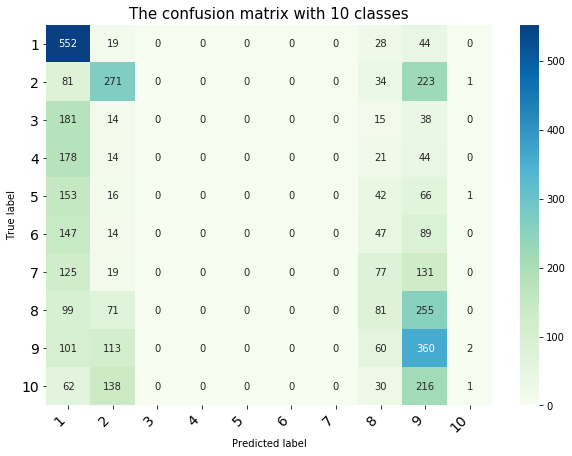

In [309]:
print_confusion_matrix(conf_matrix, ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.title('The confusion matrix with 10 classes', size = 15)

- As it can be seen, the result is not good, many of the rating is predicted as **class 1**.
- Hence, I decide to reduce the classes, to rearrange the class into three.

In [321]:
df_less_class = df[['body', 'rate']]

In [322]:
pd.options.mode.chained_assignment = None
for i in range(len(df_less_class)):
    rate = df_less_class.loc[i,'rate']
    # movie_class:
    # 1~3: negative
    # 4~7: neutral
    # 8~10: positive
    if rate == '1' or rate == '2' or rate =='3':
        df_less_class.loc[i, 'rate'] = 'negative'
    elif rate == '4' or rate == '5' or rate == '6' or rate == '7':
        df_less_class.loc[i, 'rate'] = 'neutral'
    elif rate == '8' or rate == '9' or rate == '10':
        df_less_class.loc[i, 'rate'] = 'positive'

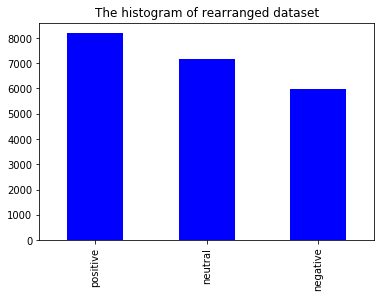

In [323]:
df_less_class.rate.value_counts().plot('bar', color = 'blue')
plt.title('The histogram of rearranged dataset')
plt.show()

In [410]:
test_less_class.rate.value_counts()

positive    1693
neutral     1433
negative    1148
Name: rate, dtype: int64

In [324]:
train_less_class, test_less_class = train_test_split(df_less_class, test_size=0.2, random_state=666)

In [325]:
y_train_lc = train_less_class.rate
y_test_lc = test_less_class.rate

In [370]:
lr = LogisticRegression(C=1e42)
lr.fit(review_tfidf, y_train_lc)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [371]:
scores = cross_validate(lr, review_tfidf, y_train_lc, cv=10, 
                        scoring=['accuracy'],
                        return_train_score=True
                       )
scores # the result is way better than before

{'fit_time': array([1.02607632, 1.065938  , 0.53779292, 0.89418387, 1.20554209,
        0.97419214, 0.88087296, 1.0191257 , 1.11042261, 0.93203926]),
 'score_time': array([0.00201178, 0.00205112, 0.00197816, 0.00199389, 0.00200891,
        0.00204015, 0.00208116, 0.0020082 , 0.0020473 , 0.00190282]),
 'test_accuracy': array([0.63237873, 0.63296318, 0.62339181, 0.64306612, 0.6348742 ,
        0.65652428, 0.61322411, 0.64131071, 0.63721475, 0.64929742]),
 'train_accuracy': array([0.68530196, 0.68218163, 0.68207228, 0.68209295, 0.68092298,
        0.68098798, 0.68657784, 0.68118297, 0.68274293, 0.68211361])}

In [372]:
# test on the test data
lr.score(tfidf_test, y_test_lc)

0.6293869911090314

In [373]:
conf_matrix = confusion_matrix(y_test_lc, lr.predict(tfidf_test))
conf_matrix

array([[ 772,  246,  130],
       [ 310,  670,  453],
       [ 112,  333, 1248]])

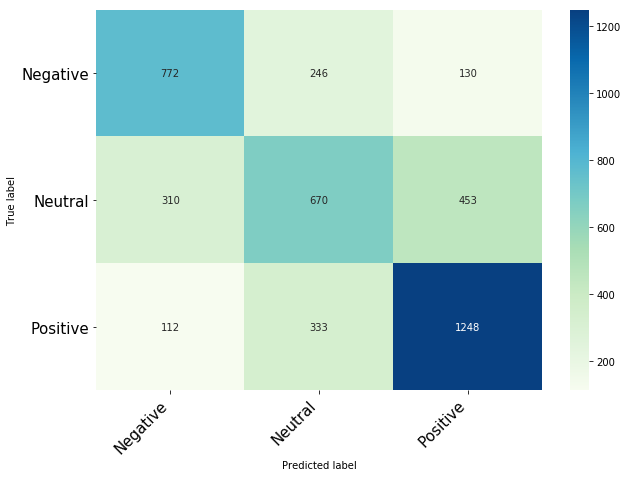

In [374]:
print_confusion_matrix(conf_matrix, ['Negative', 'Neutral', 'Positive'], fontsize=15)

In [375]:
# then, we check the coefficients to see if the model makes sense

**The below lists is the coefficient of the *Positive Class***

In [376]:
words = tfidf.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, lr.coef_[2])),
    columns = ['feature', 'coef'])

In [377]:
print ('Highest coefficients (for the positive class):')
feature_coefs.sort_values(by='coef', ascending=False)[:10]

Highest coefficients (for the positive class):


,feature,coef
64,brilliantly,17.919056
228,highly,14.713949
48,beautifully,14.447535
273,just right,13.719381
433,pleasantly,13.205397
111,definitely,12.540775
150,excellent,12.532326
14,amazing,12.502997
550,superb,12.306540
164,fascinating,12.183011


In [378]:
print ('Lowest coefficients (for the positive class):')
feature_coefs.sort_values(by='coef')[:10]
# the result make sense

Lowest coefficients (for the positive class):


,feature,coef
593,unfunny,-36.153004
282,laughable,-24.976116
175,forgettable,-24.230923
35,awful,-23.390179
56,bland,-21.959345
316,mediocre,-21.058868
614,whatsoever,-19.184256
438,poorly,-19.007989
623,wooden,-18.168074
553,supposedly,-17.685713


**The below lists is the coefficient of the *Negative Class***

In [379]:
words = tfidf.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, lr.coef_[0])),
    columns = ['feature', 'coef'])
print ('Highest coefficients (for the negative class):')
feature_coefs.sort_values(by='coef', ascending=False)[:10]

Highest coefficients (for the negative class):


,feature,coef
425,pathetic,20.537214
37,bad,20.448998
35,awful,18.931851
399,not worth,14.652466
271,just plain,13.235241
623,wooden,12.371168
420,painful,11.561677
566,terrible,11.255196
593,unfunny,10.500027
435,pointless,10.392063


In [380]:
words = tfidf.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, lr.coef_[0])),
    columns = ['feature', 'coef'])
print ('Highest coefficients (for the negative class):')
feature_coefs.sort_values(by='coef')[:10]

Highest coefficients (for the negative class):


,feature,coef
433,pleasantly,-28.255085
590,unexpected,-27.651463
150,excellent,-23.971785
111,definitely,-22.276895
594,unique,-21.509373
347,nonetheless,-21.454117
550,superb,-20.190301
48,beautifully,-19.815808
180,fresh,-18.736072
416,outstanding,-17.939375


In [381]:
# feature selection
# we have too many features, I will try to reduce the number of features.

In [382]:
from sklearn.feature_selection import SelectFromModel

In [383]:
# feature selection
lr = LogisticRegression(C=1e42)
lr.fit(review_tfidf, y_train_lc)
lr_select = SelectFromModel(lr, prefit=True)

In [384]:
x_select = lr_select.transform(review_tfidf)

In [385]:
x_select.shape

(17094, 271)

In [386]:
lr_s = LogisticRegression(C=1e42)

In [387]:
lr_s.fit(x_select, y_train_lc)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [388]:
tfidf_select = lr_select.transform(tfidf_test)

In [389]:
lr_s.score(tfidf_select, y_test_lc)

0.6251754796443613

In [390]:
conf_matrix = confusion_matrix(y_test_lc, lr_s.predict(tfidf_select))
conf_matrix

array([[ 768,  232,  148],
       [ 310,  651,  472],
       [ 114,  326, 1253]])

In [401]:
words_select = tfidf.get_feature_names()
w_df = pd.DataFrame(words_select, columns=['feature'])

In [402]:
select_index = lr_select.get_support().tolist()

In [404]:
variables = w_df[select_index]

In [408]:
words = variables.feature
feature_coefs = pd.DataFrame(
    data = list(zip(words, lr.coef_[0])),
    columns = ['feature', 'coef'])
print ('Highest coefficients (for the positive class):')
feature_coefs.sort_values(by='coef') # result is not very good

Highest coefficients (for the positive class):


,feature,coef
150,not hard,-23.971785
111,just great,-22.276895
48,double,-19.815808
180,pleasantly,-18.736072
157,not quite,-17.005940
161,not wrong,-16.837628
164,okay,-16.474380
252,unfunny,-15.852144
63,extra,-15.504909
183,poor,-14.941010


In [ ]:
# I tried to tune the parameters several time, however, it doesn't give me a better result. 
# so I will just stick with the default parameters.
# the below code are showing the preocess of tunning parameters.

In [364]:
from sklearn.model_selection import GridSearchCV

In [370]:
# select features and then tune the hyperparameters
lr = LogisticRegression(random_state=20, max_iter=10000)
param_grid = { 'C': [1, 0.5, 5, 10,100], 'multi_class' : ['ovr', 'multinomial'], 'solver':['saga','newton-cg', 'lbfgs']}
grid = GridSearchCV(lr, param_grid=param_grid, cv=10, n_jobs=-1)

In [371]:
%%time
grid.fit(review_tfidf, y)

CPU times: user 38.5 s, sys: 1.4 s, total: 39.9 s
Wall time: 39min 43s


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=20, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 0.5, 5, 10, 100], 'multi_class': ['ovr', 'multinomial'], 'solver': ['saga', 'newton-cg', 'lbfgs']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [372]:
grid.best_params_

{'C': 0.5, 'multi_class': 'ovr', 'solver': 'saga'}

In [ ]:
# we are going to mainly focus on the recall,
# recall = TP/TP+FN
# recall reference: http://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

# 5. Analysis
- The best accuracy of the model is given by the logistic regression model dealing with **3 classes** (accuracy: 62.94%)
- The model gets more positive class right than other two classes ( i.e. negative, neutral), because there are more data from positive class than other two.
- The baseline of the accuracy (meaning all results is blindly classified as one group) is 39%, the model best model reaches a fairly reasonable accuracy (or recall , we consider more about the recall for this case.)